# Black Background Shapes, OpenCV

This notebook uses **OpenCV**, **NumPy**, **Matplotlib**, and **Pandas** to:
1) Generate a black-background image with coloured shapes (rectangle, triangle, circle, lines)
2) Load & view the image
3) Convert to grayscale, show histogram, apply contrast stretching
4) Run Sobel edge detection

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

def bgr2rgb(img_bgr):
    """Convert BGR (OpenCV) image to RGB for Matplotlib display."""
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def show_img(img, title=None, cmap=None, figsize=(5,4)):
    plt.figure(figsize=figsize)
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap or 'gray')
    else:
        plt.imshow(img)
    if title: plt.title(title)
    plt.axis('off'); plt.tight_layout(); plt.show()

## 1) Create black-background image with coloured shapes

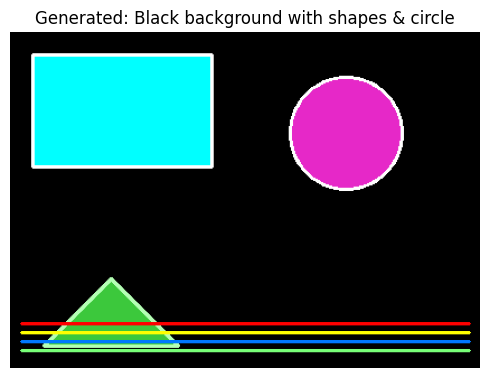

In [ ]:
H, W = 300, 420
img = np.zeros((H, W, 3), dtype=np.uint8)  # black background (BGR)

# Rectangle (cyan-like) — OpenCV uses BGR colour order
cv2.rectangle(img, (20, 20), (180, 120), color=(255, 255, 0), thickness=-1)  # fill
cv2.rectangle(img, (20, 20), (180, 120), color=(255, 255, 255), thickness=2)  # outline

# Triangle (green) — use fillConvexPoly
triangle_pts = np.array([[90, 220], [30, 280], [150, 280]], dtype=np.int32)
cv2.fillConvexPoly(img, triangle_pts, color=(60, 200, 60))
cv2.polylines(img, [triangle_pts], isClosed=True, color=(180, 255, 180), thickness=2)

# Circle (magenta)
cv2.circle(img, center=(300, 90), radius=50, color=(200, 40, 230), thickness=-1)  # fill
cv2.circle(img, center=(300, 90), radius=50, color=(255, 255, 255), thickness=2)  # outline

# A few coloured lines
line_colours = [(0,0,255), (0,255,255), (255,120,0), (120,255,120)]  # BGR
for i, c in enumerate(line_colours):
    y = 260 + i*8
    cv2.line(img, (10,y), (W-10,y), color=c, thickness=2)

# Save for reuse (optional)
cv2.imwrite('data/cv_pic_black_shapes.png', img)

# Display (convert BGR->RGB for Matplotlib)
show_img(bgr2rgb(img), 'Generated: Black background with shapes & circle')

## 2) Grayscale, histogram & contrast stretching

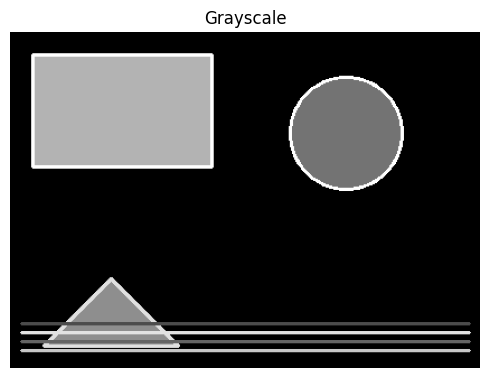

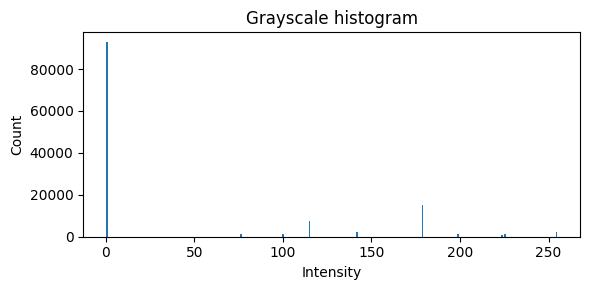

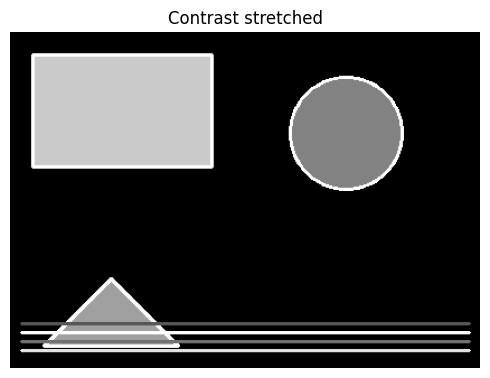

,metric,value
0,min,0.000000
1,p2,0.000000
2,median,0.000000
3,mean,0.169776
4,p98,0.886275
5,max,1.000000


In [9]:
# Convert to grayscale using OpenCV
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(gray, 'Grayscale', cmap='gray')

# Histogram
plt.figure(figsize=(6,3))
plt.hist(gray.ravel(), bins=256, range=(0,255))
plt.title('Grayscale histogram')
plt.xlabel('Intensity'); plt.ylabel('Count')
plt.tight_layout(); plt.show()

# Contrast stretching between 2nd and 98th percentiles
g = gray.astype(np.float32) / 255.0
low, high = np.percentile(g, [2, 98])
stretched = np.clip((g - low) / (high - low + 1e-8), 0, 1)
show_img(stretched, 'Contrast stretched', cmap='gray')

# Optional: quick stats table with pandas
stats = pd.DataFrame({
    'metric': ['min','p2','median','mean','p98','max'],
    'value': [float(g.min()), float(low), float(np.median(g)), float(g.mean()), float(high), float(g.max())]
})
stats

## 3) Edge detection (Sobel, OpenCV)

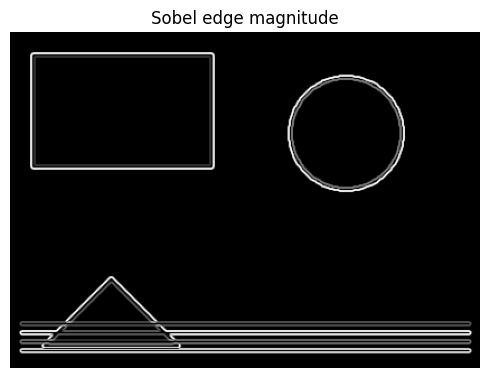

In [10]:
# Use the stretched grayscale for better edge contrast
g8 = (stretched * 255.0).astype(np.uint8)

gx = cv2.Sobel(g8, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(g8, cv2.CV_32F, 0, 1, ksize=3)
mag = np.sqrt(gx**2 + gy**2)
mag /= (mag.max() + 1e-8)
show_img(mag, 'Sobel edge magnitude', cmap='gray')